In [1]:
from keras import regularizers
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


def rename_dataframe_column(dataframe_rename_columns):
    for column in dataframe_rename_columns.columns:
        new_column_name = column.replace(" ", "_").replace('/', '_').lower()
        # new_column_name = column.replace("/", "_")
        dataframe_rename_columns.rename(index=str, columns={column: new_column_name}, inplace=True)


def clean_dataset(dataset_to_clean):
    malicious_ips = ['192.168.2.112', '198.164.30.2', '192.168.2.113', '192.168.2.112', '147.32.84.180',
                     '147.32.84.140', '10.0.2.15',
                     '172.16.253.130', '172.16.253.240', '192.168.3.35', '172.29.0.116', '192.168.248.165',
                     '131.202.243.84',
                     '192.168.2.110', '192.168.1.103', '192.168.2.109', '147.32.84.170', '147.32.84.130',
                     '192.168.106.141',
                     '172.16.253.131', '74.78.117.238', '192.168.3.25', '172.29.0.109', '10.37.130.4', '192.168.5.122',
                     '192.168.4.118',
                     '192.168.4.120', '192.168.2.105', '147.32.84.150', '147.32.84.160', '192.168.106.131',
                     '172.16.253.129',
                     '158.65.110.24', '192.168.3.65', '172.16.253.132']

    # iterate through dataframe and set value
    for row in dataset_to_clean.itertuples():
        if ((dataset_to_clean.at[row.Index, 'src_ip'] in malicious_ips) or (
                dataset_to_clean.at[row.Index, 'dst_ip'] in malicious_ips)):
            dataset_to_clean.at[row.Index, 'label'] = 1
        else:
            dataset_to_clean.at[row.Index, 'label'] = 0

    # Drop row with infinity string value
    dataset_to_clean.drop(dataset_to_clean.loc[dataset_to_clean['flow_byts_s'] == "Infinity"].index, inplace=True)
    dataset_to_clean.drop(dataset_to_clean.loc[dataset_to_clean['flow_pkts_s'] == "Infinity"].index, inplace=True)

    # Pour drop colonne completement
    to_drop = ['flow_id', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'timestamp']

    # inplace = true, fait en sorte que c est drop directement dans l objet
    dataset_to_clean.drop(to_drop, axis=1, inplace=True)

    # dataset.dropna(subset = ['Src IP','Src Port','Dst IP','Dst Port'])
    dataset_to_clean.dropna(how="any", axis=0, inplace=True)

    # cast flow pkts and
    dataset_to_clean[["flow_byts_s", "flow_pkts_s"]] = \
        dataset_to_clean[["flow_byts_s", "flow_pkts_s"]].apply(pd.to_numeric)

Using TensorFlow backend.


In [2]:
dataset_training = pd.read_csv('./ISCX_Botnet-Training.pcap_Flow_ubuntu.csv', encoding='utf-8', low_memory=False)
dataset_testing = pd.read_csv('./ISCX_Botnet-Testing.pcap_Flow.csv', encoding='utf-8', low_memory=False)

# Rename columns
rename_dataframe_column(dataset_training)
rename_dataframe_column(dataset_testing)

# Clean dataset
clean_dataset(dataset_training)
clean_dataset(dataset_testing)

In [6]:
dataset_training.columns

Index(['protocol', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean',
       'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max',
       'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s',
       'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt',
       'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt',
       'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg',
       'fwd_seg_size_avg', 'bwd

In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;}</style>"))

In [10]:
corr = dataset_training.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\justgfather\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [19]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

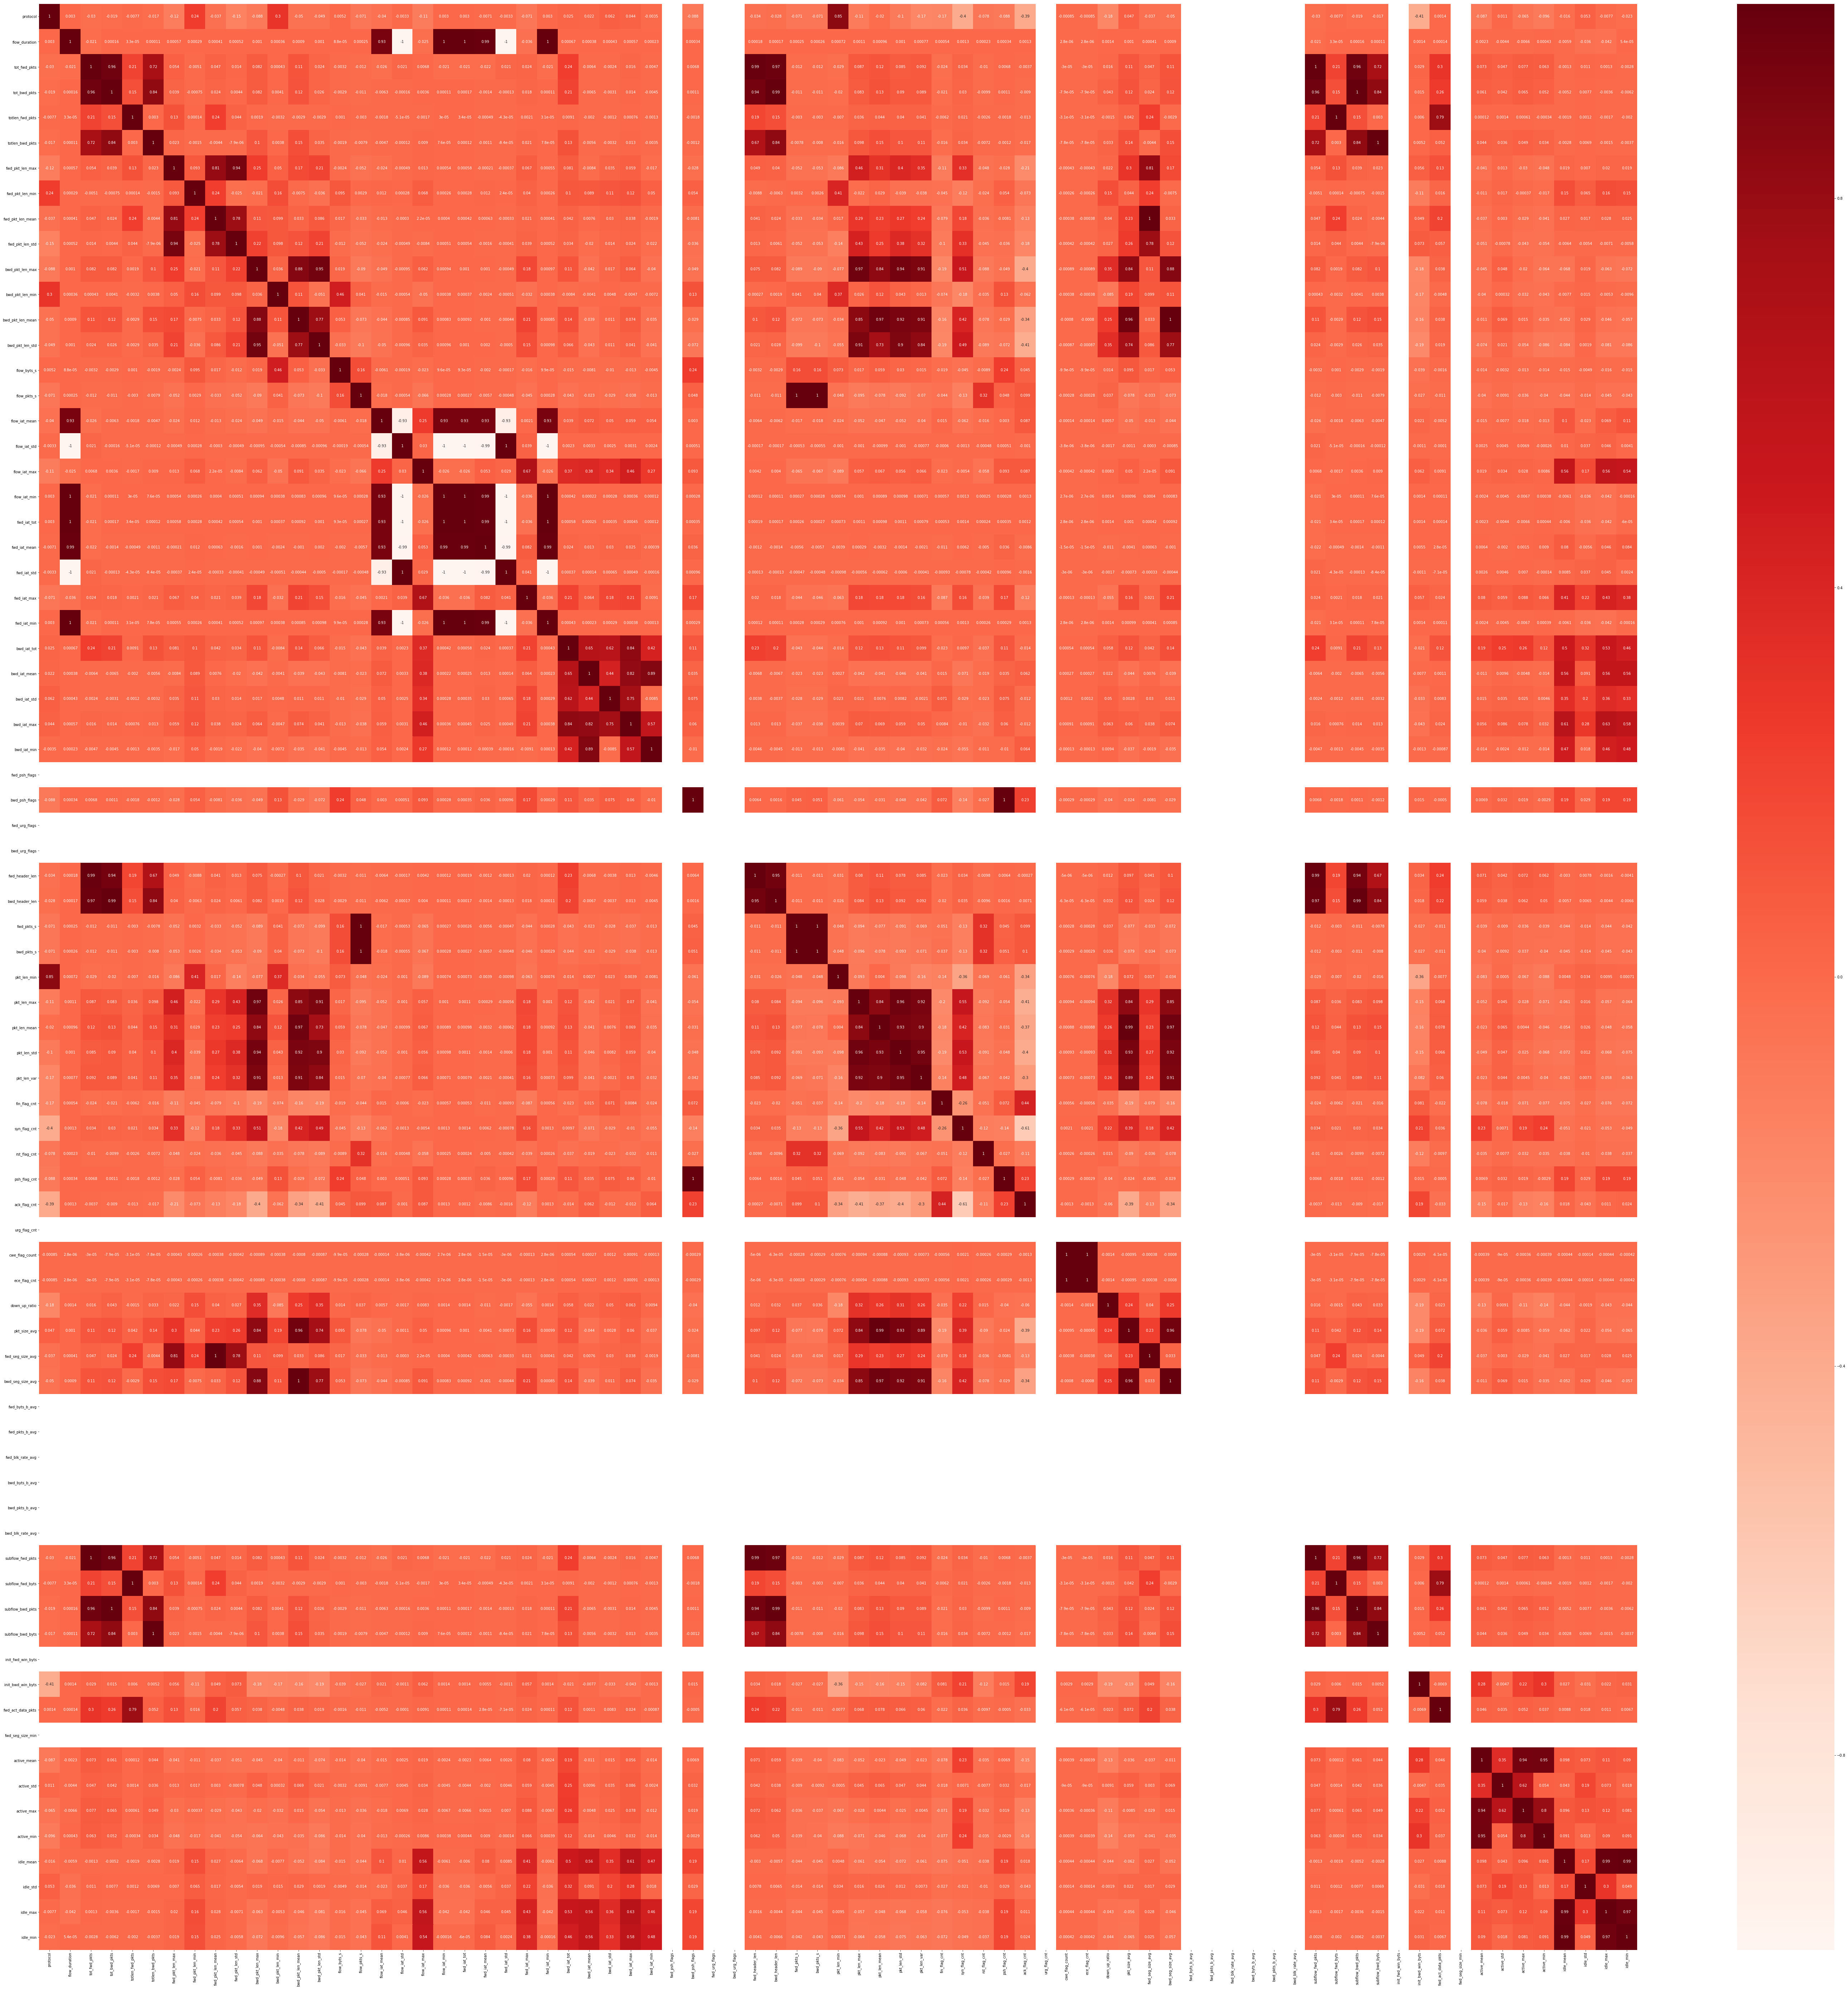

In [26]:
plt.figure(figsize=(100,100))
cor = dataset_training.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()